In [9]:
#Use the face detector trained by coco weight to detect the face with image

In [2]:
import face_detection
import skimage.io
import model as modellib
import utils
import visualize
import numpy as np
from visualize import display_images

MODEL_DIR = 'F:/model_dir'
config = face_detection.DataSetConfig()
# image = skimage.io.imread('F:/WIDER_test/images/12--Group/12_Group_Group_12_Group_Group_12_239.jpg')
# image = skimage.io.imread('F:/wider_face_split/wider_face_val/22--Picnic/22_Picnic_Picnic_22_564.jpg')
image = skimage.io.imread('C:/Users/fkmai/Desktop/01.jpg')
img, window, scale, padding = utils.resize_image(
    image, 
    min_dim=config.IMAGE_MIN_DIM, 
    max_dim=config.IMAGE_MAX_DIM,
    padding=config.IMAGE_PADDING)
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)
model.load_weights("F:/model_dir/facedetection20180512T2221/mask_rcnn_facedetection_0030.h5", by_name=True)
results = model.detect([img], verbose=1)
r = results[0]
visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'], 
                            ['background', 'face'], r['scores'])
mrcnn = model.run_graph([image], [
    ("proposals", model.keras_model.get_layer("ROI").output),
    ("probs", model.keras_model.get_layer("mrcnn_class").output),
    ("deltas", model.keras_model.get_layer("mrcnn_bbox").output),
    ("masks", model.keras_model.get_layer("mrcnn_mask").output),
    ("detections", model.keras_model.get_layer("mrcnn_detection").output),
])
det_class_ids = mrcnn['detections'][0, :, 4].astype(np.int32)
det_count = np.where(det_class_ids == 0)[0][0]
det_class_ids = det_class_ids[:det_count]
detections = mrcnn['detections'][0, :det_count]

print("{} detections: {}".format(
    det_count, np.array(['background', 'face'])[det_class_ids]))

Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000
image_metas              shape: (1, 10)               min:    0.00000  max: 1024.00000


proposals                shape: (1, 1000, 4)          min:    0.00090  max:    0.94975
probs                    shape: (1, 1000, 2)          min:    0.00025  max:    0.99975
deltas                   shape: (1, 1000, 2, 4)       min:   -2.97099  max:    3.46361
masks                    shape: (1, 100, 28, 28, 2)   min:    0.00000  max:    1.00000
detections               shape: (1, 100, 6)           min:    0.00000  max:    1.00000
43 detections: ['face' 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'face'
 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'face'
 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'face'
 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'face'
 'face' 'face' 'face']


In [2]:
import model as modellib
import face_detection

config = face_detection.DataSetConfig()
model = modellib.MaskRCNN(mode="training", config=config, model_dir='F:/model_dir')
weights_path = model.find_last()[1]
print(weights_path)

E:\python_code\Mask_RCNN\samples\face_detection
F:/model_dir\facedetection20180509T1558\mask_rcnn_facedetection_0030.h5


Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000
image_metas              shape: (1, 10)               min:    0.00000  max: 1024.00000


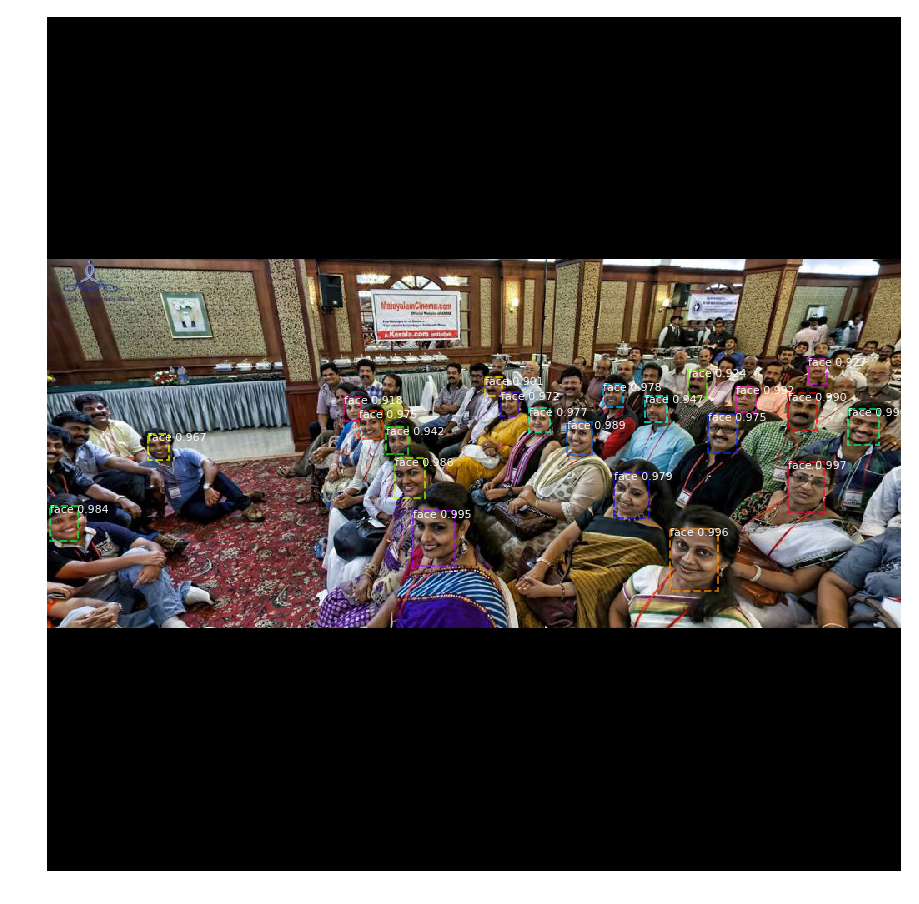

In [12]:
import face_detection
import skimage.io
import model as modellib
import utils
import visualize
from visualize import display_images

MODEL_DIR = 'F:/model_dir'
config = face_detection.DataSetConfig()
# image = skimage.io.imread('F:/WIDER_test/images/12--Group/12_Group_Group_12_Group_Group_12_239.jpg')
# image = skimage.io.imread('F:/wider_face_split/wider_face_val/22--Picnic/22_Picnic_Picnic_22_564.jpg')
image = skimage.io.imread('F:/wider_face_split/wider_face_val/11--Meeting/11_Meeting_Meeting_11_Meeting_Meeting_11_702.jpg')
img, window, scale, padding = utils.resize_image(
    image, 
    min_dim=config.IMAGE_MIN_DIM, 
    max_dim=config.IMAGE_MAX_DIM,
    padding=config.IMAGE_PADDING)
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)
model.load_weights("F:/model_dir/facedetection20180513T1051/mask_rcnn_facedetection_0001.h5", by_name=True)
results = model.detect([img], verbose=1)
r = results[0]
visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'], 
                            ['background','face'], r['scores'])